## 3.2.a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def clgs(A):
    m, n = A.shape
    R = np.zeros((n, n))
    Q = np.zeros((m, n))
    R[0, 0] = np.linalg.norm(A[:, 0], ord=2)
    Q[:, 0] = A[:, 0] / R[0, 0]
    for k in range(1, n):
        R[:k-1, k] = np.dot(Q[:m, :k-1].T, A[:m, k])
        z = A[:m, k] - np.dot(Q[:m, :k-1], R[:k-1, k])
        R[k, k] = np.linalg.norm(z, ord=2)
        Q[:m, k] = z / R[k, k]
    return Q, R

In [102]:
def mgs(A):
    m,n = A.shape
    Q = np.zeros((m,n))
    R = np.zeros((n,n))
    for j in range(0, n):
        q = A[:,j]
        for i in range(0, j):
            R[i,j] = np.vdot(q, Q[:,i])
            q = q - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(q, ord=2)
        Q[:,j] = q/R[j,j]
    return Q, R

In [75]:
import numpy as np

(U,X) = np.linalg.qr(np.random.randn(80,80))
(V,X) = np.linalg.qr(np.random.randn(80,80))

J=[i for i in range(80)]
S=np.diag([(2)^((-1)*i) for i in J])
A=U.dot(S).dot(V)

(Qc,Rc)=clgs(A)
(Qm,Rm)=mgs(A)

In [76]:
A

array([[ 0.75463731,  0.83364061,  6.65975979, ...,  0.87752121,
        -7.5988655 , -2.47230595],
       [-8.3456647 , 10.43910056, -2.15076779, ..., -2.43068308,
         9.30002561,  2.77733594],
       [ 1.05743202,  1.79288703,  4.16443952, ..., -8.03220383,
        -3.10203676, -0.14792151],
       ...,
       [-3.66972075, -6.43100112, -3.52597892, ..., -1.59194937,
         5.64644169, -4.68562332],
       [ 0.07129536, -3.34778138,  2.99078274, ...,  2.93199916,
         1.51891342,  1.83914666],
       [ 0.0900971 ,  0.75049066, -2.11670584, ...,  0.71267538,
        -6.24702548, -9.84241796]])

In [77]:
Qc.dot(Rc)

array([[ 0.75463731,  0.83364061,  6.65975979, ...,  0.87752121,
        -7.5988655 , -2.47230595],
       [-8.3456647 , 10.43910056, -2.15076779, ..., -2.43068308,
         9.30002561,  2.77733594],
       [ 1.05743202,  1.79288703,  4.16443952, ..., -8.03220383,
        -3.10203676, -0.14792151],
       ...,
       [-3.66972075, -6.43100112, -3.52597892, ..., -1.59194937,
         5.64644169, -4.68562332],
       [ 0.07129536, -3.34778138,  2.99078274, ...,  2.93199916,
         1.51891342,  1.83914666],
       [ 0.0900971 ,  0.75049066, -2.11670584, ...,  0.71267538,
        -6.24702548, -9.84241796]])

In [78]:
Qm.dot(Rm)

array([[ 0.75463731,  0.83364061,  6.65975979, ...,  0.87752121,
        -7.5988655 , -2.47230595],
       [-8.3456647 , 10.43910056, -2.15076779, ..., -2.43068308,
         9.30002561,  2.77733594],
       [ 1.05743202,  1.79288703,  4.16443952, ..., -8.03220383,
        -3.10203676, -0.14792151],
       ...,
       [-3.66972075, -6.43100112, -3.52597892, ..., -1.59194937,
         5.64644169, -4.68562332],
       [ 0.07129536, -3.34778138,  2.99078274, ...,  2.93199916,
         1.51891342,  1.83914666],
       [ 0.0900971 ,  0.75049066, -2.11670584, ...,  0.71267538,
        -6.24702548, -9.84241796]])

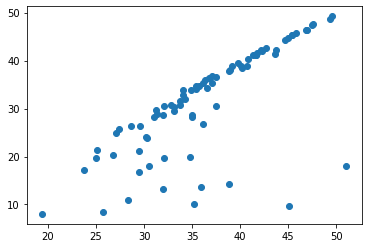

In [79]:
plt.scatter(Rc.diagonal(),Rm.diagonal())

modified GR이 더 stable 하다.

## 3.2.b.

In [80]:
def qrhouse(A):
  m,n = A.shape
  R=A.copy()
  V=np.zeros((m,n))
  for k in range(min((m-1,n))):
    x=R[k:m,k]
    v=x+np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)[:,0]
    V[k:m,k]=v
    R[k:m,k:n]=R[k:m,k:n]-np.dot(np.outer(2*v,v.T),R[k:m,k:n])/np.dot(v.T,v)
  R = np.triu(R[:n,:n])
  return V, R

def formQ(V):
  m,n = V.shape
  Q=np.eye(m)
  for j in range(0,min(m-1,n),-1):
    v=V[:,j]
    Q=Q-np.dot(np.outer(2*v,v.T),Q)/np.dot(v.T,v)
  return Q

In [81]:
A=np.array([[.70000, .70711], [.70001, .70711]])
(Qm,Rm)=mgs(A)
(V,R) = qrhouse(A)
Q=formQ(V)
print(np.linalg.norm(np.dot(Q.T,Q)-np.eye(2)))
print(np.linalg.norm(np.dot(Qm.T,Qm)-np.eye(2)))

0.0
3.254726094493924e-11


householder is more stable

## 3.3.

In [ ]:
from math import hypot

def givens_rotation(A):
    (num_rows, num_cols) = np.shape(A)
    Q = np.identity(num_rows)
    R = np.copy(A)
    (rows, cols) = np.tril_indices(num_rows, -1, num_cols)
    for (row, col) in zip(rows, cols):
        if R[row, col] != 0:
            r = hypot(R[col, col], R[row, col])
            c = R[col, col]/r
            s = -R[row, col]/r

            G = np.identity(num_rows)
            G[[col, row], [col, row]] = c
            G[row, col] = s
            G[col, row] = -s

            R = np.dot(G, R)
            Q = np.dot(Q, G.T)

    return (Q, R)

In [ ]:
A=np.array([[10, 4], [6, 8]])
(Q,R) = np.linalg.qr(A)
(Q1,R1) = givens_rotation(A)

In [ ]:
Q

array([[-0.85749293, -0.51449576],
       [-0.51449576,  0.85749293]])

In [ ]:
Q1

array([[ 0.85749293, -0.51449576],
       [ 0.51449576,  0.85749293]])

In [ ]:
R

array([[-11.66190379,  -7.54593775],
       [  0.        ,   4.80196038]])

In [ ]:
R1

array([[11.66190379,  7.54593775],
       [ 0.        ,  4.80196038]])

## 4.3.a. & 4.3.b.

- spectral radius는 항상 1 근방으로 계산됨.
- 2 norm은 spectral radius보다 항상 크나, 2로 수렴해감.
- equality 보이지 않음.

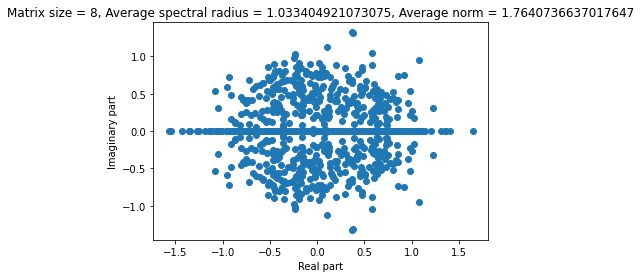

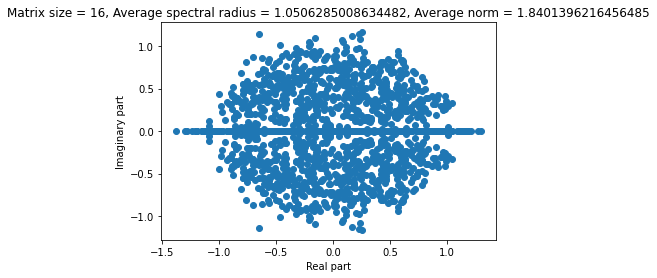

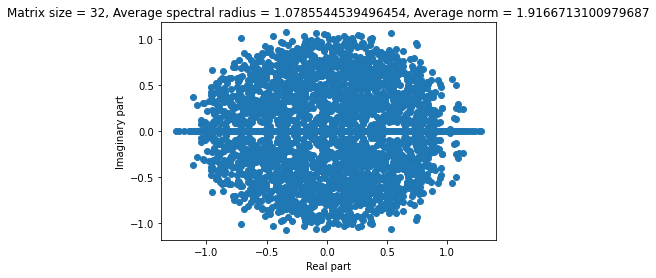

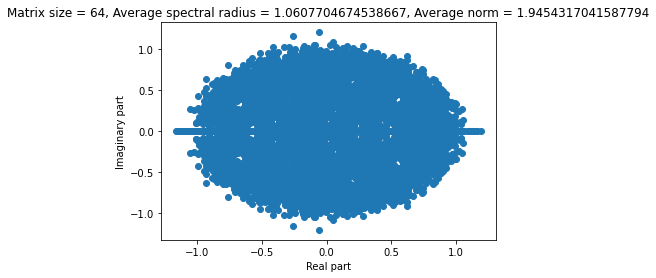

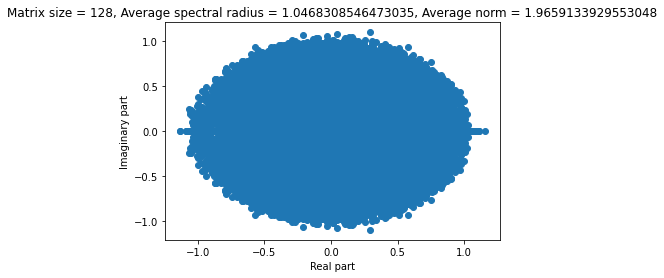

In [27]:
for n in range(3,8):
  lam = []
  rho = []
  norms = []
  for i in range(0,100):
    A = (np.random.randn(2**n,2**n))/np.sqrt(2**n)
    eigs_temp = np.linalg.eigvals(A)
    rho.append(max(abs(eigs_temp)))
    lam.extend(list(eigs_temp))
    norms.append(np.linalg.norm(A, ord=2))
  plt.plot(np.real(lam), np.imag(lam),'o')
  plt.xlabel('Real part')
  plt.ylabel('Imaginary part')
  plt.title('Matrix size = {0}, Average spectral radius = {1}, Average norm = {2}'.format(2**n,np.mean(rho),np.mean(norms)))
  plt.show()

## 4.3.c.

Text(0, 0.5, 'Fraction of matrices')

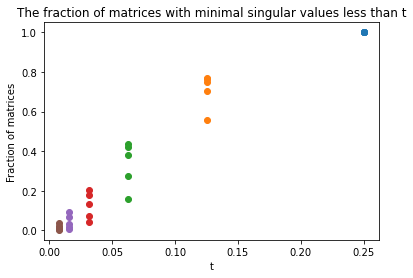

In [155]:
min_sing = []
datas = []
bounds = []
for n in range(3,8):
  for i in range(100):
    A = (np.random.randn(2**n,2**n))/np.sqrt(2**n)
    (U,S,V) = np.linalg.svd(A)
    min_sing.append(min(S))
  data = []
  bound = []
  for j in range(2,8):
    bound.append(2**(-j))
    data.append(sum(min_sing[i] for i in range(len(min_sing)) if min_sing[i] <= 2**(-j))/len(min_sing))
  bounds.append(bound)
  datas.append(data)
datas = np.array(datas)
for i in range(5):
  datas[i,:] = datas[i,:]/datas[i,0]
plt.plot(bounds,datas,'o')
plt.title('The fraction of matrices with minimal singular values less than t')
plt.xlabel('t')
plt.ylabel('Fraction of matrices')

- 맨 윗줄부터 matrix size 128, 64, 32, 16, 8일 때....
- matrix size 커질수록 더 작은 minimal eigenvalue를 갖는다.

## 4.3.d.

In [111]:
def forwardsubs(R,b):
  (m,n) = R.shape
  x = np.zeros((n,1))
  
  x[0] = b[0]/R[0,0]
  
  for j in range(1,n):
    x[j] = (b[j]-np.dot(R[j,0:j],x[0:j]))/R[j,j]

  return x

def backsubs(R,b):
  (m,n) = R.shape
  x = np.zeros((n,1))
  
  x[n-1] = b[n-1]/R[n-1,n-1]
  
  for j in reversed(range(n-2)):
    x[j] = (b[j]-np.dot(R[j,j+1:n],x[j+1:n]))/R[j,j]

  return x

def formQb(W,b):
  m,n = W.shape

  for k in range(n):
    b[k:m] = b[k:m] - 2*np.dot(W[k:m,k],np.dot(W[k:m,k].T,b[k:m]))
  
  Qb = b
  return Qb

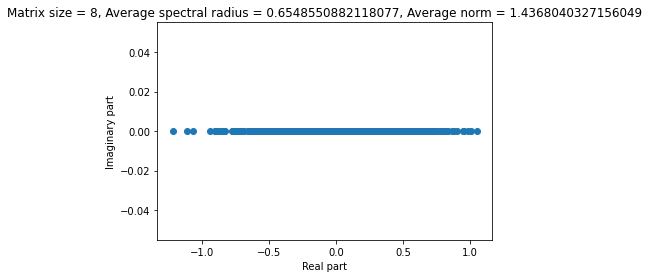

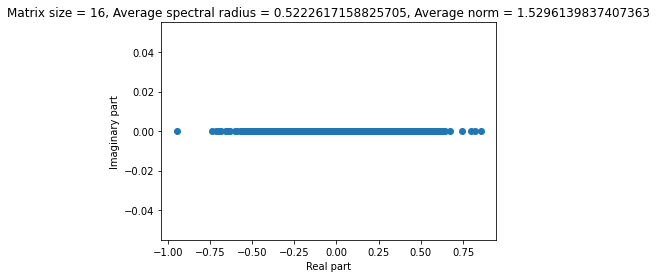

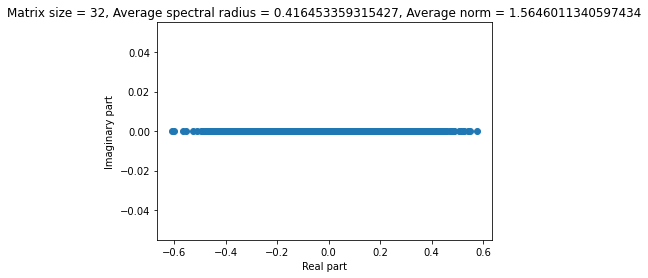

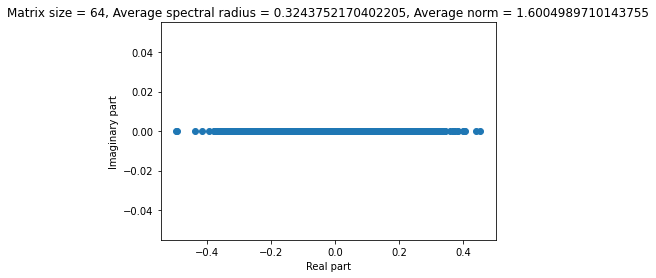

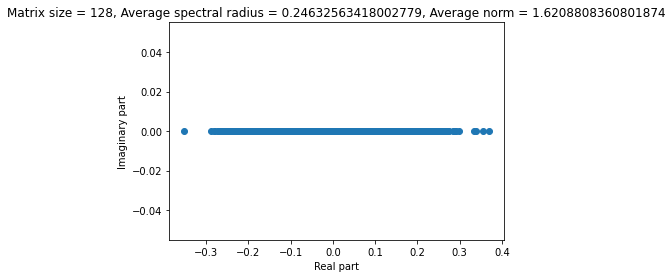

In [55]:
def T(m):
  A = (np.random.randn(m,m))/np.sqrt(m)
  A = np.triu(A)
  return A

for n in range(3,8):
  lam = []
  rho = []
  norms = []
  for i in range(100):
    A = T(2**n)
    eigs_temp = np.linalg.eigvals(A)
    rho.append(max(abs(eigs_temp)))
    lam.extend(list(eigs_temp))
    norms.append(np.linalg.norm(A,ord = 2))
  plt.plot(np.real(lam),np.imag(lam),'o')
  plt.xlabel('Real part');
  plt.ylabel('Imaginary part')
  plt.title('Matrix size = {0}, Average spectral radius = {1}, Average norm = {2}'.format(2**n,np.mean(rho),np.mean(norms)))
  plt.show()

Text(0, 0.5, 'Fraction of matrices')

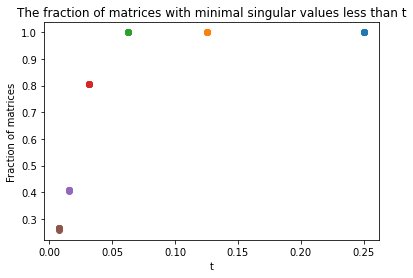

In [156]:
min_sing = []
datas = []
bounds = []
for n in range(3,8):
  for i in range(100):
    A = T(2**n)
    (U,S,V) = np.linalg.svd(A)
    min_sing.append(min(S))
  data = []
  bound = []
  for j in range(2,8):
    bound.append(2**(-j))
    data.append(sum(min_sing[i] for i in range(len(min_sing)) if min_sing[i] <= 2**(-j))/len(min_sing))
  bounds.append(bound)
  datas.append(data)
datas = np.array(datas)
for i in range(5):
  datas[i,:] = datas[i,:]/datas[i,0]
plt.plot(bounds,datas,'o')
plt.title('The fraction of matrices with minimal singular values less than t')
plt.xlabel('t')
plt.ylabel('Fraction of matrices')

## 4.4.

In [158]:
m = 50
n = 12

t = np.linspace(0,1,m)
b = np.cos(4*t)

A = np.vander(t)

A = np.fliplr(A)
A = A[:,0:n]

x = np.zeros((n,6)) # (a) ~ (f)의 x 값들을 담을 matrix

# (a)
B = np.dot(A.T,A)
R = np.linalg.cholesky(B)
w = forwardsubs(R.T,np.dot(A.T,b))[:,0]
x[:,0] = backsubs(R,w)[:,0]

# (b)
Q,R = mgs(A)
x[:,1] = backsubs(R,np.dot(Q.T,b))[:,0]
  
# (c)
V,R = qrhouse(A)
Qb = formQb(V,b)
x[:,2] = backsubs(R,Qb)[:,0]

# (d)
Q,R = np.linalg.qr(A)
x[:,3] = backsubs(R,np.dot(Q.T,b))[:,0]

# (e)
x[:,4] = np.dot(np.linalg.pinv(A),b) 

# (f)
[U,S,V] = np.linalg.svd(A,0)
c = np.dot(U.T,b)        
for i in range(n):       
  c[i] = c[i]/S[i]
x[:,5] = np.dot(V,c)

In [159]:
x

array([[-1.81850070e-01,  1.00000083e+00, -6.50418493e+00,
        -4.24280312e+01,  2.75280949e+01, -2.27367446e+07],
       [-3.38033137e+00, -1.82158887e-04,  1.72776255e+03,
         1.23477655e+04, -3.01075084e+03, -4.28562743e+07],
       [-4.13882297e+01, -7.99428133e+00, -5.38862087e+04,
        -4.02443428e+05,  7.97941748e+04,  5.91911866e+07],
       [-5.10111921e+02, -7.04761342e-02,  6.52938943e+05,
         4.99565229e+06, -9.47909908e+05, -7.20002049e+07],
       [-6.46858953e+03,  1.11132433e+01, -4.05156355e+06,
        -3.14244027e+07,  6.23837790e+06, -8.04657555e+07],
       [-8.43902085e+04, -1.63958075e+00,  1.44694030e+07,
         1.13149803e+08, -2.51287782e+07,  8.35022948e+07],
       [-1.12948406e+06, -2.00311305e+00, -3.12687328e+07,
        -2.45752740e+08,  6.51720551e+07, -8.03489465e+07],
       [-1.54667112e+07, -5.14315462e+00,  4.10264250e+07,
         3.23440644e+08, -1.11057422e+08, -7.09761683e+07],
       [-2.16238103e+08,  5.95139961e+00, -3.093